In [1]:
#!pip install PySulfSat --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.12'

## Lets get the XANES data

In [2]:
Xanes=pd.read_excel('Muth_2021_XANES_data.xlsx', sheet_name='Python_Format')
Xanes.head()

,Unnamed: 0,Tephra Sample,Unnamed: 2,MI_Name,IS6+,IS4+,IS2-,S6+/∑S,% Correction,Centroid (eV),Centroid s.e.,Fe3+/∑ Fe,Fe3+/∑ Fe s.e.,log (fO2),Δ QFM
0,BAS-44,BAS-44-2,1,BAS-44-2-1,7.354331,0.423996,11.238376,0.414778,3.407118,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.
1,BAS-44,BAS-44-2,11,BAS-44-2-11,4.139189,0.014333,9.09103,0.316135,0.237677,7112.355948,0.054592,0.169955,0.021161,-,-
2,BAS-44,BAS-44-2,13,BAS-44-2-13,5.9849,0.080526,10.058093,0.379671,0.839338,7112.293533,0.054013,0.146247,0.020097,-,-
3,BAS-44,BAS-44-2,2,BAS-44-2-2,9.56074,0.240583,7.057561,0.586993,1.053414,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.
4,BAS-44,BAS-44-2,6,BAS-44-2-6,11.112967,0.165563,7.665407,0.6006,0.602835,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.


In [6]:
EPMA=pd.read_excel('Muth_2021_EPMA.xlsx', sheet_name='Python_Format').fillna(0)
EPMA.head()

,CinderCone,TephraSample,Inclusion,MI_Name,MinimumInclusionWidth(μm),MaxmimumInclusionWidth(μm),Vaporbubble?,VaporbubbleDiameter*(μm),OxideinMI?,SulfideinMI?,Unnamed: 10,DateAnalyzedEPMA,Unnamed: 12,SiO2_Liq,SiO2_Liq_Err,TiO2_Liq,TiO2_Liq_Err,Al2O3_Liq,Al2O3_Liq_Err,FeOt_Liq,FeOt_Liq_Err,MnO_Liq,MnO_Liq_Err,MgO_Liq,MgO_Liq_Err,CaO_Liq,CaO_Liq_Err,Na2O_Liq,Na2O_Liq_Err,K2O_Liq,K2O_Liq_Err,P2O5_Liq,P2O5_Liq_Err,S,S_Err,Cl,Cl_Err,Unnamed: 37,H2O,1s.d.,Unnamed: 40,OlivineHostFo%,Unnamed: 42,Li,s.e.,B,s.e..1,Sc,s.e..2,V,s.e..3,Rb,s.e..4,Sr,s.e..5,Y,s.e..6,Zr,s.e..7,Nb,s.e..8,Ba,s.e..9,La,s.e..10,Ce,s.e..11,Nd,s.e..12,Sm,s.e..13,Dy,s.e..14,Yb,s.e..15,Pb,s.e..16
0,BAS-44,BAS-44-2,1,BAS-44-2-1,54,58,yes,12,no,no,0.0,2018-07-31 00:00:00,0.0,48.468740,0.255558,0.844557,0.040902,17.632948,0.063263,7.853806,0.160862,0.121238,0.015576,7.943174,0.052921,11.610937,0.083259,2.643864,0.082228,0.251994,0.033529,0.143024,0.016439,0.120751,0.005210,0.034176,0.003373,0.0,0.757813,0.014444,0.0,87.090250,0.0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
1,BAS-44,BAS-44-2,10,BAS-44-2-10,36,40,yes,8,no,yes,0.0,2018-07-31 00:00:00,0.0,48.144037,0.518126,1.009788,0.036884,18.249961,0.061072,8.314267,0.210087,0.150730,0.011396,7.158404,0.209839,10.834366,0.049634,2.869904,0.132912,0.408805,0.042447,0.190988,0.002842,0.034622,0.003080,0.039507,0.001602,0.0,n.a.,n.a.,0.0,87.703689,0.0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
2,BAS-44,BAS-44-2,2,BAS-44-2-2,52,91,yes,19,yes,yes,0.0,2018-07-31 00:00:00,0.0,48.340063,1.647544,1.013694,0.025342,17.576325,0.163923,7.136001,0.307460,0.139974,0.010356,7.818675,0.076752,11.167228,0.144827,2.928907,0.121795,0.284238,0.027897,0.177640,0.015800,0.127116,0.006729,0.044141,0.004280,0.0,1.437547,0.090747,0.0,87.548180,0.0,n.a.,n.a.,n.a.,n.a.,30.362339,3.009268,196.84715,27.51854,n.a.,n.a.,401.189362,10.741426,18.355113,1.084067,75.808659,5.610223,2.839829,0.220506,114.466733,1.910813,7.876938,0.201392,21.083968,0.571564,12.946576,0.295104,2.946084,0.082246,3.400137,0.145466,2.397429,0.145466,2.262408,0.088751
3,BAS-44,BAS-44-2,4,BAS-44-2-4,84,86,yes,22,yes,yes,0.0,2018-07-23 00:00:00,0.0,48.863347,0.411573,1.036627,0.031965,18.256738,0.286351,7.148649,0.447200,0.130846,0.010852,6.836847,0.902522,11.417651,0.336459,2.909423,0.405236,0.280442,0.038903,0.203884,0.043620,0.124240,0.004625,0.040326,0.001728,0.0,1.139373,0.025917,0.0,87.332363,0.0,n.a.,n.a.,n.a.,n.a.,31.878931,3.200932,222.423637,6.652549,n.a.,n.a.,430.870863,5.600183,18.762854,1.060895,79.880145,4.430863,3.326031,0.253685,115.236041,2.680182,7.775707,0.185598,21.204471,0.673016,13.081842,0.350906,3.427463,0.146439,3.484886,0.193494,2.333039,0.193494,1.90958,0.027466
4,BAS-44,BAS-44-2,5,BAS-44-2-5,55,66,yes,14,no,yes,0.0,2018-07-23 00:00:00,0.0,47.493071,2.341048,0.982112,0.014200,17.633842,0.115411,7.606872,0.192590,0.120886,0.009958,7.574775,0.179293,11.313223,0.127270,2.782203,0.120126,0.284889,0.018712,0.167839,0.003947,0.121574,0.001218,0.043136,0.000706,0.0,1.266599,0.00723,0.0,87.088948,0.0,n.a.,n.a.,n.a.,n.a.,37.575121,3.698475,214.496879,4.048224,n.a.,n.a.,445.707246,2.816859,21.104908,1.144294,83.84896,4.585844,3.457986,0.282045,136.412039,2.366092,8.346069,0.1837,21.929349,0.429627,13.354592,0.300417,3.311883,0.097065,3.784742,0.153043,2.221326,0.153043,2.084059,0.072342


In [7]:
combo=pd.merge(Xanes, EPMA, on ='MI_Name', how='left')
combo.head()

,Unnamed: 0,Tephra Sample,Unnamed: 2,MI_Name,IS6+,IS4+,IS2-,S6+/∑S,% Correction,Centroid (eV),Centroid s.e.,Fe3+/∑ Fe,Fe3+/∑ Fe s.e.,log (fO2),Δ QFM,CinderCone,TephraSample,Inclusion,MinimumInclusionWidth(μm),MaxmimumInclusionWidth(μm),Vaporbubble?,VaporbubbleDiameter*(μm),OxideinMI?,SulfideinMI?,Unnamed: 10,DateAnalyzedEPMA,Unnamed: 12,SiO2_Liq,SiO2_Liq_Err,TiO2_Liq,TiO2_Liq_Err,Al2O3_Liq,Al2O3_Liq_Err,FeOt_Liq,FeOt_Liq_Err,MnO_Liq,MnO_Liq_Err,MgO_Liq,MgO_Liq_Err,CaO_Liq,CaO_Liq_Err,Na2O_Liq,Na2O_Liq_Err,K2O_Liq,K2O_Liq_Err,P2O5_Liq,P2O5_Liq_Err,S,S_Err,Cl,Cl_Err,Unnamed: 37,H2O,1s.d.,Unnamed: 40,OlivineHostFo%,Unnamed: 42,Li,s.e.,B,s.e..1,Sc,s.e..2,V,s.e..3,Rb,s.e..4,Sr,s.e..5,Y,s.e..6,Zr,s.e..7,Nb,s.e..8,Ba,s.e..9,La,s.e..10,Ce,s.e..11,Nd,s.e..12,Sm,s.e..13,Dy,s.e..14,Yb,s.e..15,Pb,s.e..16
0,BAS-44,BAS-44-2,1,BAS-44-2-1,7.354331,0.423996,11.238376,0.414778,3.407118,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.,BAS-44,BAS-44-2,1,54,58,yes,12,no,no,0.0,2018-07-31 00:00:00,0.0,48.468740,0.255558,0.844557,0.040902,17.632948,0.063263,7.853806,0.160862,0.121238,0.015576,7.943174,0.052921,11.610937,0.083259,2.643864,0.082228,0.251994,0.033529,0.143024,0.016439,0.120751,0.005210,0.034176,0.003373,0.0,0.757813,0.014444,0.0,87.090250,0.0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
1,BAS-44,BAS-44-2,11,BAS-44-2-11,4.139189,0.014333,9.09103,0.316135,0.237677,7112.355948,0.054592,0.169955,0.021161,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAS-44,BAS-44-2,13,BAS-44-2-13,5.9849,0.080526,10.058093,0.379671,0.839338,7112.293533,0.054013,0.146247,0.020097,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAS-44,BAS-44-2,2,BAS-44-2-2,9.56074,0.240583,7.057561,0.586993,1.053414,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.,BAS-44,BAS-44-2,2,52,91,yes,19,yes,yes,0.0,2018-07-31 00:00:00,0.0,48.340063,1.647544,1.013694,0.025342,17.576325,0.163923,7.136001,0.307460,0.139974,0.010356,7.818675,0.076752,11.167228,0.144827,2.928907,0.121795,0.284238,0.027897,0.177640,0.015800,0.127116,0.006729,0.044141,0.004280,0.0,1.437547,0.090747,0.0,87.548180,0.0,n.a.,n.a.,n.a.,n.a.,30.362339,3.009268,196.84715,27.51854,n.a.,n.a.,401.189362,10.741426,18.355113,1.084067,75.808659,5.610223,2.839829,0.220506,114.466733,1.910813,7.876938,0.201392,21.083968,0.571564,12.946576,0.295104,2.946084,0.082246,3.400137,0.145466,2.397429,0.145466,2.262408,0.088751
4,BAS-44,BAS-44-2,6,BAS-44-2-6,11.112967,0.165563,7.665407,0.6006,0.602835,n. a.,n. a.,n. a.,n. a.,n. a.,n. a.,BAS-44,BAS-44-2,6,62,98,yes,19,yes,yes,0.0,2018-07-23 00:00:00,0.0,47.582437,0.234626,1.016846,0.066993,18.445208,0.820123,7.676191,0.456354,0.138914,0.018416,7.428888,1.129453,11.414494,0.104635,3.124136,0.277267,0.300265,0.008022,0.168093,0.022509,0.124374,0.009966,0.045826,0.002624,0.0,1.24651,0.033857,0.0,87.684604,0.0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.


In [8]:
## Find ones with both Fe and S Xanes
combo_numeric=combo.apply(pd.to_numeric, errors='coerce').fillna(0)
combo_filt=combo.loc[(combo_numeric['S6+/∑S']>0)& (combo_numeric['Fe3+/∑ Fe']>0) & (combo_numeric['SiO2_Liq']>0)]
print(len(combo_filt))
combo_filt.head()

30


,Unnamed: 0,Tephra Sample,Unnamed: 2,MI_Name,IS6+,IS4+,IS2-,S6+/∑S,% Correction,Centroid (eV),Centroid s.e.,Fe3+/∑ Fe,Fe3+/∑ Fe s.e.,log (fO2),Δ QFM,CinderCone,TephraSample,Inclusion,MinimumInclusionWidth(μm),MaxmimumInclusionWidth(μm),Vaporbubble?,VaporbubbleDiameter*(μm),OxideinMI?,SulfideinMI?,Unnamed: 10,DateAnalyzedEPMA,Unnamed: 12,SiO2_Liq,SiO2_Liq_Err,TiO2_Liq,TiO2_Liq_Err,Al2O3_Liq,Al2O3_Liq_Err,FeOt_Liq,FeOt_Liq_Err,MnO_Liq,MnO_Liq_Err,MgO_Liq,MgO_Liq_Err,CaO_Liq,CaO_Liq_Err,Na2O_Liq,Na2O_Liq_Err,K2O_Liq,K2O_Liq_Err,P2O5_Liq,P2O5_Liq_Err,S,S_Err,Cl,Cl_Err,Unnamed: 37,H2O,1s.d.,Unnamed: 40,OlivineHostFo%,Unnamed: 42,Li,s.e.,B,s.e..1,Sc,s.e..2,V,s.e..3,Rb,s.e..4,Sr,s.e..5,Y,s.e..6,Zr,s.e..7,Nb,s.e..8,Ba,s.e..9,La,s.e..10,Ce,s.e..11,Nd,s.e..12,Sm,s.e..13,Dy,s.e..14,Yb,s.e..15,Pb,s.e..16
9,BBL,BBL-5,32,BBL-5-32,27.025533,0,12.188453,0.694419,0,7112.326615,0.048014,0.158692,0.01826,-8.528006,0.06223,BBL,BBL-5,32,46,68,no,n.r.,no,no,0.0,2018-07-31 00:00:00,0.0,49.928525,0.678665,1.270821,0.096405,16.755591,0.404524,9.230927,0.303896,0.170783,0.019579,5.486115,0.520599,9.811559,0.047518,3.620198,0.264134,0.620793,0.030958,0.283074,0.023520,0.133403,0.010529,0.037024,0.003920,0.0,1.23501,0.112563,0.0,83.713383,0.0,n.a.,n.a.,n.a.,n.a.,38.169542,3.752211,199.681667,3.717661,n.a.,n.a.,329.013135,2.515789,24.665231,1.342262,107.079611,5.812276,5.895018,0.447975,273.965136,5.732726,10.283273,0.203754,25.131673,0.440844,15.819299,0.401364,4.077491,0.107052,4.479248,0.113349,2.820648,0.113349,3.711793,0.113966
10,BBL,BBL-5,33,BBL-5-33,9.365231,0,0.131424,0.993656,0,7112.465,0.036065,0.213707,0.014959,-7.675274,0.914962,BBL,BBL-5,33,50,73,yes,15,no,no,0.0,2018-07-23 00:00:00,0.0,49.217861,0.825791,1.288750,0.026556,16.749303,0.115552,9.614724,0.420127,0.171826,0.007783,6.033436,0.152587,9.214457,0.172061,3.699514,0.212874,0.716508,0.096533,0.332001,0.030083,0.150144,0.007291,0.038655,0.001702,0.0,1.232055,0.113527,0.0,83.078326,0.0,n.a.,n.a.,n.a.,n.a.,39.744193,3.899916,220.758741,4.540721,n.a.,n.a.,344.958473,2.813759,27.215177,1.518479,125.636869,7.104657,7.037324,0.537743,349.276691,5.99072,12.747524,0.235548,30.306992,0.602448,18.547151,0.435463,4.33048,0.128393,4.651712,0.201777,2.916466,0.201777,4.605807,0.095167
11,BBL,BBL-5,34,BBL-5-34,14.987923,0,25.349495,0.374388,0,7112.38654,0.045158,0.18193,0.017848,-8.194755,0.395481,BBL,BBL-5,34,66,70,yes,n.r.,no,yes,0.0,2018-07-31 00:00:00,0.0,51.666197,1.876183,1.123500,0.018804,15.420533,0.083276,9.144514,0.194047,0.157054,0.018462,6.318138,0.149600,10.347291,0.136053,3.389791,0.187045,0.470203,0.020508,0.214040,0.010884,0.124034,0.004470,0.030388,0.003448,0.0,1.209455,0.025529,0.0,83.573642,0.0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
16,BBL,BBL-5,43,BBL-5-43,2.429194,0.078236,7.64678,0.249979,2.425366,7112.365944,0.023203,0.173842,0.009052,-8.198536,0.3917,BBL,BBL-5,43,84,99,no,n.r.,no,no,0.0,2019-11-14 00:00:00,0.0,49.585428,0.314276,1.246884,0.036322,16.657728,0.313526,9.493343,0.424967,0.186833,0.004634,7.117724,0.043281,8.805293,0.065173,3.562566,0.272982,0.792121,0.036137,0.280157,0.017175,0.108941,0.001649,0.036309,0.001469,0.0,0.968013,0.001549,0.0,83.612720,0.0,n.a.,n.a.,n.a.,n.a.,38.023975,3.727186,199.666817,2.174755,n.a.,n.a.,342.094196,6.442455,24.011341,1.306126,118.478841,6.422875,7.058796,0.532023,341.200541,5.680879,12.038877,0.270275,29.937213,0.486082,17.970352,0.250755,4.240203,0.125776,4.7042,0.136996,2.933271,0.136996,4.904508,0.1369
17,BBL,BBL-5,44,BBL-5-44,4.242236,0.133569,8.556457,0.342309,2.083198,7112.282654,0.028747,0.142214,0.010618,-8.74327,-0.153033,BBL,BBL-5,44,46,50,no,n.r.,yes,yes,0.0,2019-11-14 00:00:00,0.0,48.499094,0.386098,0.981204,0.036339,18.784365,0.161871,7.927122,0.387210,0.143673,0.001353,7.262274,0.057336,11.025627,0.127017,2.775515,0.097441,0.278404,0.003957,0.114633,0.005722,0.093533,0.000522,0.020213,0.0003

In [10]:
combo_filt.to_excel('Muth_data_Merged.xlsx')

In [2]:
## you will need to upgrade to version 12 for this to work
#!pip install PySulfSat --upgrade

In [3]:
df_out=pd.read_excel('SF_Penny.xlsx', sheet_name='Glass_input')
df_out.head()

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Total,Fe3Fet_Liq,S6/ST_Liq,TK_Liq,log10fO2_Liq
0,H11X1B,52.722061,2.078349,13.263636,9.207601,0.147274,9.318931,10.259794,2.243409,0.425260,0.222000,99.888316,0.095125,0.016864,1498.15,-9.018204
1,SF1-2,51.714850,1.941993,13.657822,8.360871,0.130140,9.096345,10.814900,2.164912,0.299321,0.164426,98.345582,0.130768,0.039675,1498.15,-7.668204
2,SF3-2,51.567451,2.056640,13.250730,9.734076,NaN,8.715509,10.832119,2.108367,0.288614,0.209420,98.762926,0.152433,0.052460,1423.15,-8.549332
3,SF4-3,52.307084,2.115382,13.413576,9.250087,0.126129,7.620000,11.699182,2.091335,0.322605,0.191894,99.137275,0.144174,0.033447,1273.15,-10.626974
4,SF8-3,50.705760,2.110107,14.149170,7.868018,0.128190,8.810731,11.508023,2.023935,0.328292,0.279165,97.911390,0.111376,0.033561,1498.15,-10.630000


In [4]:
df_err=pd.read_excel('SF_Penny.xlsx', sheet_name='Abs_err')
df_err.head()

,Sample_ID,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,Total,Fe3Fet_Liq_Err,S6/ST_Liq_Err,TK_Liq_Err,log10fO2_Liq_Err
0,H11X1B,0.527221,0.020783,0.132636,0.092076,0.001473,0.093189,0.102598,0.022434,0.004253,0.002220,0.998883,0.01,0.000169,5,0.3
1,SF1-2,0.517149,0.019420,0.136578,0.083609,0.001301,0.090963,0.108149,0.021649,0.002993,0.001644,0.983456,0.01,0.000397,5,0.3
2,SF3-2,0.515675,0.020566,0.132507,0.097341,0.000000,0.087155,0.108321,0.021084,0.002886,0.002094,0.987629,0.01,0.000525,5,0.3
3,SF4-3,0.523071,0.021154,0.134136,0.092501,0.001261,0.076200,0.116992,0.020913,0.003226,0.001919,0.991373,0.01,0.000334,5,0.3
4,SF8-3,0.507058,0.021101,0.141492,0.078680,0.001282,0.088107,0.115080,0.020239,0.003283,0.002792,0.979114,0.01,0.000336,5,0.3


## Lets perform calcs straight up first

In [5]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=df_out, T_K=df_out['TK_Liq'],
                    Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

calc_GivenFe3.head()
calc_GivenFe3.to_csv('OMFeoutput.csv',index=True)

In [6]:
calc_GivenfO2=ss.calculate_OM2022_S6St(df=df_out, T_K=df_out['TK_Liq'],
                    logfo2=df_out['log10fO2_Liq'])

calc_GivenfO2.head()
calc_GivenfO2.to_csv('OMfO2output.csv',index=True)

Text(0, 0.5, 'Calc S6/St')

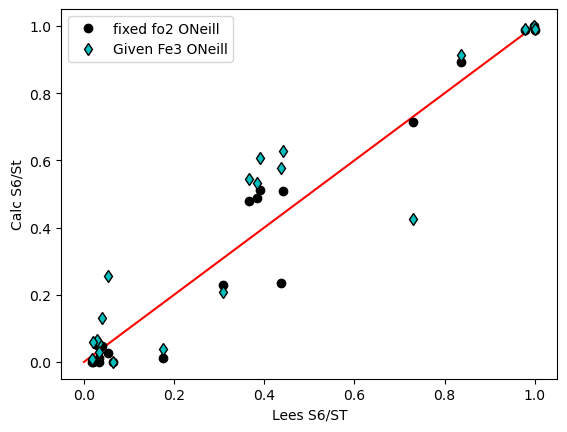

In [7]:
plt.plot([0, 1], [0, 1], '-r')
plt.plot(df_out['S6/ST_Liq'],
         calc_GivenfO2['S6St_Liq'],
         'ok', label='fixed fo2 ONeill')
plt.plot(df_out['S6/ST_Liq'],
         calc_GivenFe3['S6St_Liq'],
         'dk', mfc='c', label='Given Fe3 ONeill')

plt.legend()
plt.xlabel('Lees S6/ST')
plt.ylabel('Calc S6/St')

## Now lets account for error

In [8]:
df_noisy_abs=ss.add_noise_2_dataframes(df_values=df_out, df_err=df_err, 
        error_type="Abs", error_dist="normal", N_dups=1000)
df_noisy_abs.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Total,Fe3Fet_Liq,S6/ST_Liq,TK_Liq,log10fO2_Liq,Sample_ID
0,52.975457,2.078666,13.243942,9.190725,0.146541,9.332929,10.243112,2.216417,0.426008,0.221225,101.287464,0.094302,0.016792,1490.726210,-8.646171,H11X1B
1,52.410916,2.104365,13.164298,9.148698,0.146544,9.165359,10.317613,2.266470,0.418375,0.220854,98.165841,0.092679,0.016893,1505.883179,-8.746050,H11X1B
2,52.434240,2.097811,13.400153,9.187047,0.145695,9.297561,10.154869,2.282623,0.424605,0.217797,98.135518,0.090580,0.016761,1504.247804,-8.974904,H11X1B
3,52.667203,2.072912,13.115827,9.129852,0.147497,9.284112,10.271386,2.251042,0.424990,0.224215,99.779481,0.108588,0.016951,1501.391062,-8.751775,H11X1B
4,52.680239,2.075475,13.162537,9.295658,0.148325,9.321687,10.417194,2.292961,0.423232,0.221763,101.186285,0.096869,0.016704,1502.750287,-8.880120,H11X1B


Text(0.5, 0, 'SiO2 MC')

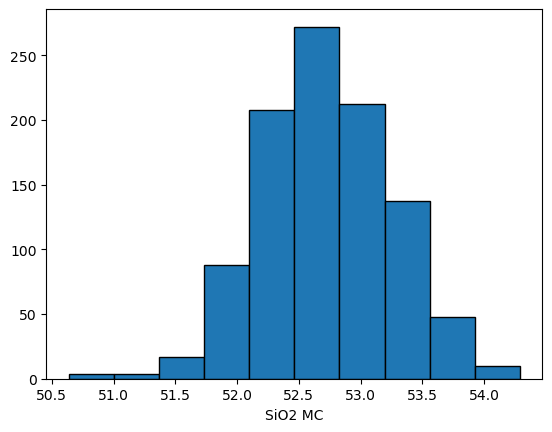

In [9]:
# Lets look at the output for SiO2 for the first sample
plt.hist(df_noisy_abs['SiO2_Liq'].loc[df_noisy_abs['Sample_ID']=='H11X1B'], ec='k')
plt.xlabel('SiO2 MC')

Text(0.5, 0, 'Fe3Fet_Liq MC')

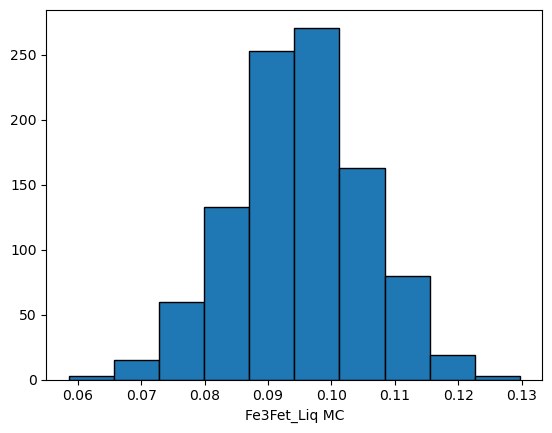

In [10]:
# Lets look at the output for SiO2 for the first sample
plt.hist(df_noisy_abs['Fe3Fet_Liq'].loc[df_noisy_abs['Sample_ID']=='H11X1B'], ec='k')
plt.xlabel('Fe3Fet_Liq MC')

## Now put all this synthetic simulated data into the S6 calculation

In [11]:
noisy_ONeill_Fe_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['TK_Liq'])
noisy_ONeill_Fe_S6St.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Total,Fe3Fet_Liq,S6/ST_Liq,TK_Liq,log10fO2_Liq,Sample_ID,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.008179,-2.615948,12.650315,-17.170287,-4.797957,0.140211,52.975457,2.078666,13.243942,9.190725,0.146541,9.332929,10.243112,2.216417,0.426008,0.221225,101.287464,0.094302,0.016792,1490.726210,-8.646171,H11X1B,0.543026,0.142617,0.001272,0.078787,0.112500,0.080000,0.022025,0.002785,0.016027,0.000960,0.491084,0.128976,0.001151,0.071250,0.101739,0.144696,0.039836,0.005038,0.014494,0.001736,0.644143,0.666510,-8.085370,0.064531
1,0.007053,-2.471155,12.495806,-16.799181,-4.947236,0.084205,52.410916,2.104365,13.164298,9.148698,0.146544,9.165359,10.317613,2.266470,0.418375,0.220854,98.165841,0.092679,0.016893,1505.883179,-8.746050,H11X1B,0.541423,0.141147,0.001282,0.079037,0.114200,0.080138,0.022698,0.002757,0.016352,0.000966,0.489285,0.127555,0.001159,0.071426,0.103203,0.144842,0.041024,0.004983,0.014777,0.001745,0.641034,0.663095,-7.972209,0.064806
2,0.006127,-2.489919,12.501719,-16.838859,-5.088923,0.057552,52.434240,2.097811,13.400153,9.187047,0.145695,9.297561,10.154869,2.282623,0.424605,0.217797,98.135518,0.090580,0.016761,1504.247804,-8.974904,H11X1B,0.540381,0.142844,0.001272,0.079180,0.112133,0.081381,0.022805,0.002791,0.016262,0.000950,0.487740,0.128929,0.001148,0.071467,0.101210,0.146906,0.041168,0.005039,0.014678,0.001715,0.643364,0.664841,-8.016950,0.064994
3,0.028345,-2.520249,12.529222,-16.908379,-3.534533,0.399121,52.667203,2.072912,13.115827,9.129852,0.147497,9.284112,10.271386,2.251042,0.424990,0.224215,99.779481,0.108588,0.016951,1501.391062,-8.751775,H11X1B,0.542349,0.142524,0.001286,0.078625,0.113329,0.079590,0.022472,0.002792,0.016056,0.000977,0.490444,0.128884,0.001163,0.071100,0.102483,0.143947,0.040642,0.005049,0.014520,0.001768,0.644464,0.670344,-7.707073,0.063379
4,0.010081,-2.473429,12.566236,-16.875268,-4.586958,0.164815,52.680239,2.075475,13.162537,9.295658,0.148325,9.321687,10.417194,2.292961,0.423232,0.221763,101.186285,0.096869,0.016704,1502.750287,-8.880120,H11X1B,0.540077,0.142466,0.001288,0.079697,0.114428,0.079520,0.022789,0.002768,0.016005,0.000962,0.488299,0.128807,0.001164,0.072057,0.103457,0.143792,0.041208,0.005005,0.014471,0.001740,0.641259,0.664346,-7.926285,0.065077


## Now calculate the error bar for each row

In [12]:
Stats_Fe_S6=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID'])
Stats_Fe_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,H11X1B,1000,0.012724,0.008811,0.012230,0.116376,0.000141
1,SF1-2,1000,0.145188,0.128473,0.082306,0.570998,0.008479
2,SF3-2,1000,0.268751,0.261654,0.111209,0.668750,0.044307
3,SF4-3,1000,0.063591,0.055615,0.038986,0.310493,0.007583
4,SF8-3,1000,0.038415,0.029946,0.030476,0.221013,0.001964


## Do the same for uncertainty in fo2

In [13]:
noisy_ONeill_fo2_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, logfo2=df_noisy_abs['log10fO2_Liq'],
                                          T_K=df_noisy_abs['TK_Liq'])
Stats_fo2_S6=pt.av_noise_samples_series(calc=noisy_ONeill_fo2_S6St['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID'])
Stats_fo2_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,H11X1B,1000,2.498562e-04,9.189856e-05,6.731415e-04,0.015402,1.039663e-06
1,SF1-2,1000,8.723326e-02,4.847368e-02,1.101272e-01,0.763768,2.540416e-04
2,SF3-2,1000,5.603669e-02,2.613667e-02,8.289504e-02,0.747987,5.526131e-04
3,SF4-3,1000,2.725610e-02,1.047139e-02,4.859836e-02,0.588880,2.013049e-04
4,SF8-3,1000,1.634398e-07,6.945280e-08,3.325412e-07,0.000006,8.478664e-10


Text(0, 0.5, 'Calc S6/St')

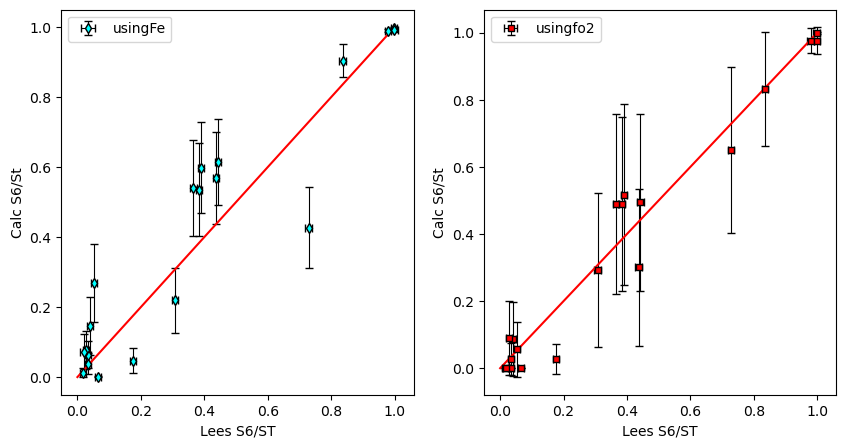

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.errorbar(df_out['S6/ST_Liq'],
         Stats_Fe_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6['St_dev_calc'],
               fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='usingFe')

ax2.errorbar(df_out['S6/ST_Liq'],
         Stats_fo2_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_fo2_S6['St_dev_calc'],
               fmt='s', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='usingfo2')
ax1.legend()
ax2.legend()
ax1.plot([0, 1], [0, 1], '-r')
ax2.plot([0, 1], [0, 1], '-r')
ax1.set_xlabel('Lees S6/ST')
ax1.set_ylabel('Calc S6/St')
ax2.set_xlabel('Lees S6/ST')
ax2.set_ylabel('Calc S6/St')

## Lets do the same using Nash
- If you just want to vary 1 thing, you can do it this way
- First, take your dataframe, and duplicate it N times, all the columns will be the same, but will now be Sample1-Sample1-Sample1, Sample2-Sample2-Sample2

In [23]:
N_dup=1000
Dupdf=ss.duplicate_dataframe(df=df_out, N_dup=N_dup)

### Now you can make the errors for one column at a time if you prefer

- E.g. adding a temp error of +- 1sigma = 50 K

In [48]:
Temp_Err=ss.add_noise_series(df_out['TK_Liq'], error_var=10,
error_type="Abs", error_dist="normal", N_dup=N_dup)
# Then add this to the dataframe
Dupdf['T_K_MC']=Temp_Err

- And adding a Fe3Fet_Liq error of +-0.02

In [49]:
Fe3_Err=ss.add_noise_series(df_out['Fe3Fet_Liq'], error_var=0.02,
error_type="Abs", error_dist="normal", N_dup=N_dup)
## 
Dupdf['Fe3Fet_Liq_MC']=Fe3_Err

- Lets add a logfo2 error of +-0.5 log units

In [50]:
logfo2_err=ss.add_noise_series(df_out['log10fO2_Liq'], error_var=0.5,
error_type="Abs", error_dist="normal", N_dup=N_dup)

- Now convert that to deltaQFM

In [54]:
buffers=pt.convert_fo2_to_buffer(fo2=10**logfo2_err, T_K=Temp_Err, P_kbar=1/1000)
buffers.head()

using low temp


,DeltaNNO_Frost1991,DeltaQFM_Frost1991,QFM_equation_Choice,T_K,P_kbar,fo2,DeltaQFM_ONeill1987,Cut off T (K)
0,-1.259314,-0.523927,High T,1506.511099,0.001,3.568758e-09,-0.399660,846.175
1,-1.624792,-0.888267,High T,1491.146739,0.001,1.038798e-09,-0.764317,846.175
2,-0.956819,-0.219784,High T,1484.365346,0.001,4.056250e-09,-0.095976,846.175
3,-1.639947,-0.903332,High T,1489.951288,0.001,9.726638e-10,-0.779407,846.175
4,-2.041777,-1.306207,High T,1504.024278,0.001,5.529588e-10,-1.181991,846.175


## Now put these uncertainties into Nash

In [45]:
noisy_Nash_S6St=ss.calculate_S6St_Nash2019(Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
                                          T_K=Dupdf['T_K_MC'])
noisy_Nash_S6St.head()

0    0.019502
1    0.026613
2    0.051846
3    0.000663
4    0.001864
dtype: float64

In [46]:
Stats_Nash_S6=pt.av_noise_samples_series(calc=noisy_Nash_S6St, sampleID=Dupdf['Sample_ID'])
Stats_Nash_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,H11X1B,1000,0.020156,0.006665,0.036564,0.338152,4.156261e-07
1,SF1-2,1000,0.162850,0.110456,0.158152,0.923020,2.208406e-04
2,SF3-2,1000,0.167776,0.125809,0.147789,0.834392,1.495529e-03
3,SF4-3,1000,0.010050,0.004990,0.016612,0.260584,2.698517e-06
4,SF8-3,1000,0.061773,0.029967,0.083325,0.696263,4.030472e-05


## And Jugo

In [56]:
noisy_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=buffers['DeltaQFM_Frost1991'])
noisy_Jugo.head()

0    0.000711
1    0.000133
2    0.002879
3    0.000124
4    0.000019
Name: DeltaQFM_Frost1991, dtype: float64

In [57]:
Stats_Jugo_S6=pt.av_noise_samples_series(calc=noisy_Jugo, sampleID=Dupdf['Sample_ID'])
Stats_Jugo_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,H11X1B,1000,1.263371e-03,8.521839e-05,0.005901,0.091812,2.151260e-08
1,SF1-2,1000,1.383412e-01,3.695247e-02,0.218699,0.987242,6.713099e-05
2,SF3-2,1000,1.525093e-01,4.216171e-02,0.226152,0.995320,2.300297e-06
3,SF4-3,1000,1.482645e-01,4.123135e-02,0.220046,0.994961,9.776487e-06
4,SF8-3,1000,8.334844e-07,4.960155e-08,0.000005,0.000110,2.628904e-11


Text(0, 0.5, 'Predicted S6/ST jugo')

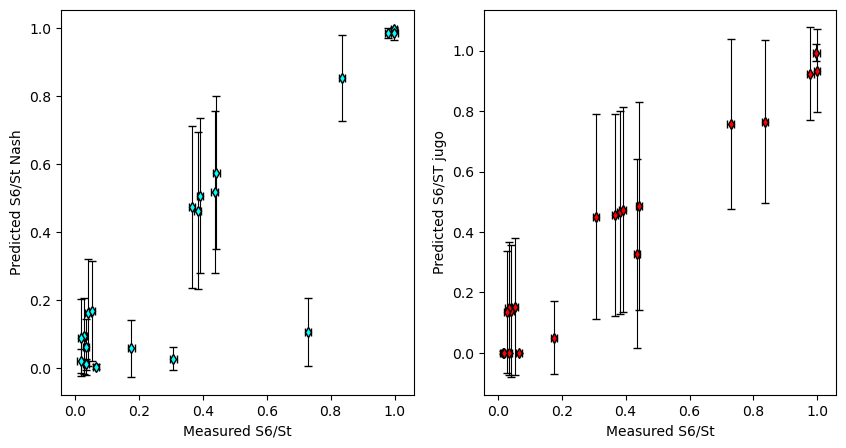

In [60]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.errorbar(df_out['S6/ST_Liq'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='usingFe')

ax2.errorbar(df_out['S6/ST_Liq'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='usingFe')
ax1.set_xlabel('Measured S6/St')
ax1.set_ylabel('Predicted S6/St Nash')
ax2.set_xlabel('Measured S6/St')
ax2.set_ylabel('Predicted S6/ST jugo')